Họ và tên: Phạm Đức Thể

MSSV: 19522253

Lớp: DS300.N11

LAB01 - 19/09/2022

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1EF4MkkJkjS-TVOHZ6rwdy9hlW4JyMrkc?usp=sharing)

# **LAB 01 - LÀM VIỆC VỚI RATING DATA, THU THẬP DỮ LIỆU**

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import time

from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from bs4 import BeautifulSoup

sns.set()

## Rating Data

In [ ]:
PATH = '/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/NĂM 4 2022-2023/HỌC KỲ 1 2022 - 2023/DS300.N11 - HỆ KHUYẾN NGHỊ/THỰC HÀNH/LAB/LAB01 - 19 09 2022/dataset'

### [Movies rating dataset](https://grouplens.org/datasets/movielens/)

In [ ]:
# load dữ liệu từ file ratings
ratings = pd.read_csv(PATH+'/ml-latest-small/ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
# load dữ liệu từ file movies
movies = pd.read_csv(PATH+'/ml-latest-small/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
# xem 1 cột trên file ratings
ratings.iloc[:,0]

0           1
1           1
2           1
3           1
4           1
         ... 
100831    610
100832    610
100833    610
100834    610
100835    610
Name: userId, Length: 100836, dtype: int64

In [ ]:
# xem nhiều cột trên file ratings
ratings.iloc[:,0:3]

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [ ]:
# chọn ra các lượt rating > 3.5
ratings[ratings['rating'] > 3.5]

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100830,610,166528,4.0,1493879365
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047


In [ ]:
# chọn ra các lượt rating cho bộ phim có id = 100
ratings[ratings['movieId'] == 100]

,userId,movieId,rating,timestamp
605,6,100,3.0,845555151
4947,32,100,4.0,856736290
13097,84,100,3.0,860396882
25993,181,100,3.0,845470909
26118,182,100,3.0,1055153511
29961,207,100,3.0,1258548270
44470,297,100,1.0,900872461
48603,314,100,3.0,847175533
51919,337,100,3.0,860255992
68381,444,100,3.0,839310140


In [ ]:
# chọn ra các lượt rating của user có id là 350
ratings[ratings['userId'] == 350]

,userId,movieId,rating,timestamp
53017,350,1,4.0,864940931
53018,350,7,3.0,864941017
53019,350,12,3.0,864941118
53020,350,17,2.0,864940932
53021,350,32,4.0,864940930
53022,350,65,3.0,864941118
53023,350,95,3.0,864940931
53024,350,112,3.0,864941018
53025,350,141,3.0,864940931
53026,350,260,4.0,864940972


In [ ]:
df_ratings = ratings.copy()
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
# Thêm một cột "birthday" vào dataframe ratings với giá trị ngẫu nhiên cho từng hàng là 1960 đến 2010
df_ratings['birthday'] = np.random.randint(1960, 2010, df_ratings.shape[0])
df_ratings

,userId,movieId,rating,timestamp,birthday
0,1,1,4.0,964982703,1967
1,1,3,4.0,964981247,1996
2,1,6,4.0,964982224,1994
3,1,47,5.0,964983815,2001
4,1,50,5.0,964982931,1981
...,...,...,...,...,...
100831,610,166534,4.0,1493848402,1978
100832,610,168248,5.0,1493850091,1968
100833,610,168250,5.0,1494273047,1980
100834,610,168252,5.0,1493846352,1970


In [ ]:
# thêm côt "is_old" vào dataframe ratings với giá trị True nếu năm <1990 và false nếu ngược lại
df_ratings['is_old'] = np.where(df_ratings['birthday'] < 1990, True, False)
df_ratings

,userId,movieId,rating,timestamp,birthday,is_old
0,1,1,4.0,964982703,1967,True
1,1,3,4.0,964981247,1996,False
2,1,6,4.0,964982224,1994,False
3,1,47,5.0,964983815,2001,False
4,1,50,5.0,964982931,1981,True
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,1978,True
100832,610,168248,5.0,1493850091,1968,True
100833,610,168250,5.0,1494273047,1980,True
100834,610,168252,5.0,1493846352,1970,True


In [ ]:
# Xoá hai cột vừa tạo ở trên
df_ratings.drop(columns=['birthday', 'is_old'], inplace=True)
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
# đếm số lượng rating cho từng giá trị rating 0.5 -> 5 
ratings['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

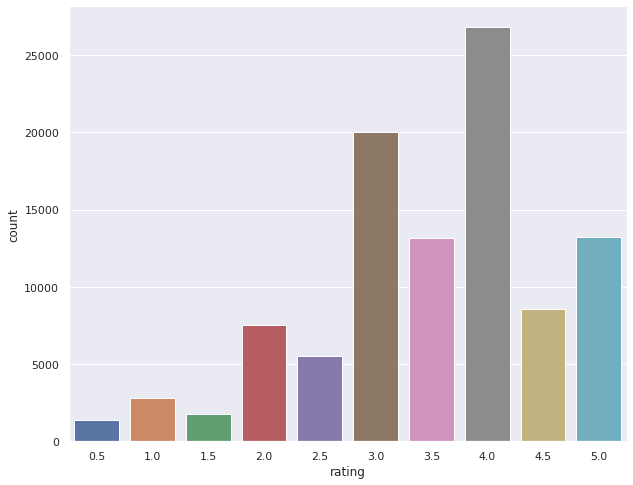

In [ ]:
# Vẽ biểu đồ cột thể hiện số lượng cho từng giá trị ratings trên
plt.figure(figsize=(10,8))
sns.countplot(x=ratings['rating'],)
plt.show()

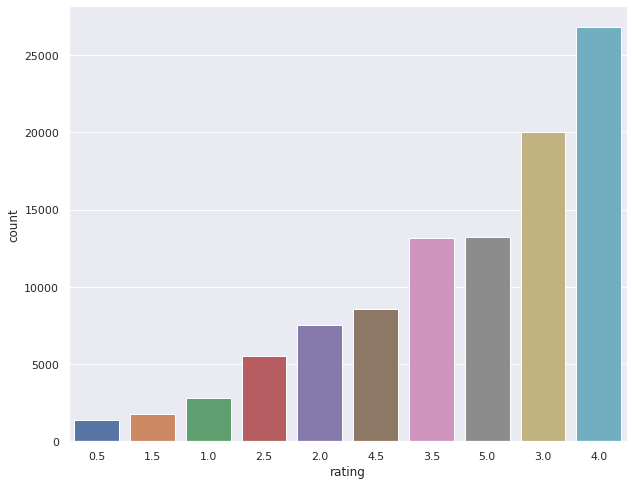

In [ ]:
# sắp xếp danh sách ratings theo chiều tăng dần theo giá trị rating
plt.figure(figsize=(10,8))
sns.countplot(x=ratings['rating'], 
              order=ratings['rating'].value_counts().sort_values().index)
plt.show()

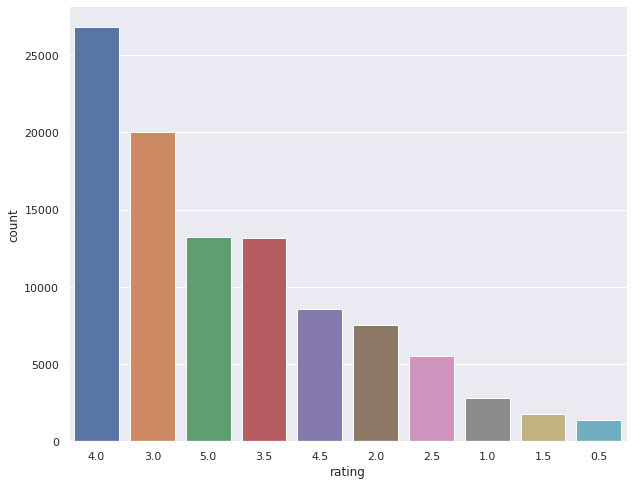

In [ ]:
# sắp xếp danh sách ratings theo chiều giảm dần theo giá trị rating
plt.figure(figsize=(10,8))
sns.countplot(x=ratings['rating'], 
              order=ratings['rating'].value_counts().sort_values(ascending=False).index)
plt.show()

In [ ]:
# đếm xem có bao nhiều người tham gia đánh giá
print(f"Số lượng người tham gia đánh giá là: {ratings['userId'].nunique()} người")

Số lượng người tham gia đánh giá là: 610 người


In [ ]:
# Đếm xem có bao nhiêu bộ phim được đánh giá
print(f"Số lượng bộ phim được đánh giá là: {ratings['movieId'].nunique()} phim")

Số lượng bộ phim được đánh giá là: 9724 phim


In [ ]:
# Tính xem trung bình mỗi người rating bao nhiêu bộ phim
ratings.groupby(['userId'])['movieId'].count().reset_index(name='num_movie_ratings')

,userId,num_movie_ratings
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44
...,...,...
605,606,1115
606,607,187
607,608,831
608,609,37


In [ ]:
# Tính xem mỗi bộ phim có bao nhiêu lượt rating
ratings.groupby(['movieId'])['userId'].count().reset_index(name='num_ratings')

,movieId,num_ratings
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1


In [ ]:
# groupby bảng ratings theo "movieId" và tính rating trung bình cho từng bộ phim
ratings.groupby(['movieId'])['rating'].mean().reset_index(name='avg_ratings')

,movieId,avg_ratings
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
...,...,...
9719,193581,4.000000
9720,193583,3.500000
9721,193585,3.500000
9722,193587,3.500000


In [ ]:
# Tìm tên 5 bộ phim có rating trung bình thấp nhất
top5_min = ratings.groupby(['movieId'])['rating'].mean().sort_values() .reset_index(name='avg_ratings').head(5)
top5_min_movie = pd.merge(top5_min, movies, on='movieId')
top5_min_movie

,movieId,avg_ratings,title,genres
0,26696,0.5,Lionheart (1990),Action
1,3604,0.5,Gypsy (1962),Musical
2,7312,0.5,"Follow Me, Boys! (1966)",Comedy|Drama
3,145724,0.5,Idaho Transfer (1973),Sci-Fi
4,76030,0.5,Case 39 (2009),Horror|Thriller


In [ ]:
# Tìm tên 5 bộ phim có rating trung bình cao nhất
top5_max = ratings.groupby(['movieId'])['rating'].mean().sort_values(ascending=False) .reset_index(name='avg_ratings').head(5)
top5_max_movie = pd.merge(top5_max, movies, on='movieId')
top5_max_movie

,movieId,avg_ratings,title,genres
0,88448,5.0,Paper Birds (Pájaros de papel) (2010),Comedy|Drama
1,100556,5.0,"Act of Killing, The (2012)",Documentary
2,143031,5.0,Jump In! (2007),Comedy|Drama|Romance
3,143511,5.0,Human (2015),Documentary
4,143559,5.0,L.A. Slasher (2015),Comedy|Crime|Fantasy


In [ ]:
# merge bảng ratings, và movies theo cột "movieID"
ratings_movies = pd.merge(ratings, movies, on='movieId')
ratings_movies

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [ ]:
# Chuyển bảng ratings sang dataframe với các cột là "userId" và các hàng là "movieId" (*)
ratings_df = ratings.pivot(index='movieId', columns='userId')['rating']
ratings_df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# chuyển (*) sang numpy.ndarray (như ma trân rating) (**)
rating_array = ratings_df.to_numpy(na_value=0)
rating_array

array([[4. , 0. , 0. , ..., 2.5, 3. , 5. ],
       [0. , 0. , 0. , ..., 2. , 0. , 0. ],
       [4. , 0. , 0. , ..., 2. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [ ]:
# Nhân ma trận trên với 2
rating_array_multi_2 = rating_array*2
rating_array_multi_2

array([[ 8.,  0.,  0., ...,  5.,  6., 10.],
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 8.,  0.,  0., ...,  4.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
# Cộng ma trận trên với 3
rating_array_add_3 = rating_array+3
rating_array_add_3

array([[7. , 3. , 3. , ..., 5.5, 6. , 8. ],
       [3. , 3. , 3. , ..., 5. , 3. , 3. ],
       [7. , 3. , 3. , ..., 5. , 3. , 3. ],
       ...,
       [3. , 3. , 3. , ..., 3. , 3. , 3. ],
       [3. , 3. , 3. , ..., 3. , 3. , 3. ],
       [3. , 3. , 3. , ..., 3. , 3. , 3. ]])

In [ ]:
# lấy ra dòng đầu tiên trong (*) và chuyển sang numpy.ndarray (như vector cho movieId = 1)
array_movie_1 = ratings_df.loc[0:1,:].to_numpy(na_value=0)
array_movie_1

array([[4. , 0. , 0. , 0. , 4. , 0. , 4.5, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 2.5, 0. , 4.5, 3.5, 4. , 0. , 3.5, 0. , 0. , 0. , 0. , 0. ,
        3. , 0. , 0. , 0. , 5. , 3. , 3. , 0. , 0. , 0. , 0. , 0. , 0. ,
        5. , 0. , 0. , 5. , 3. , 4. , 5. , 0. , 0. , 0. , 3. , 0. , 0. ,
        0. , 3. , 0. , 0. , 5. , 0. , 0. , 0. , 0. , 0. , 5. , 4. , 0. ,
        4. , 0. , 2.5, 0. , 0. , 5. , 0. , 4.5, 0. , 0. , 0.5, 0. , 4. ,
        0. , 0. , 0. , 2.5, 0. , 0. , 0. , 4. , 0. , 0. , 3. , 3. , 4. ,
        0. , 3. , 0. , 0. , 5. , 0. , 4.5, 0. , 0. , 0. , 0. , 4. , 0. ,
        0. , 0. , 4. , 0. , 0. , 0. , 0. , 3. , 0. , 0. , 0. , 0. , 0. ,
        0. , 3.5, 0. , 4. , 0. , 0. , 4. , 0. , 0. , 0. , 0. , 0. , 3. ,
        0. , 2. , 0. , 3. , 4. , 0. , 4. , 0. , 0. , 3. , 4. , 0. , 0. ,
        3.5, 5. , 0. , 0. , 0. , 0. , 0. , 5. , 0. , 2. , 0. , 3. , 4. ,
        0. , 0. , 4.5, 4. , 4. , 0. , 0. , 0. , 0. , 5. , 3.5, 0. , 4.5,
        0. , 5. , 0. , 0. , 0. , 0. , 0. , 5. , 4. 

In [ ]:
# lấy ra dòng thứ 2 trong (*) và chuyển sang numpy.ndarray (như vector cho movieId = 2)
array_movie_2 = ratings_df.loc[2:2,:].to_numpy(na_value=0)
array_movie_2

array([[0. , 0. , 0. , 0. , 0. , 4. , 0. , 4. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 3. , 3. , 3. , 3.5, 0. , 0. , 0. , 0. , 0. ,
        4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4.5, 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. , 0. , 0. , 0. ,
        0. , 0. , 2.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 3. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 3. ,
        0. , 5. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. , 3. ,
        0. , 0. , 5. , 0. , 0. , 0. , 0. , 1.5, 0. , 0. , 0. , 0. , 3. ,
        0. , 0. , 0. , 0. , 4. , 0. , 0. , 4. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 3. , 0. , 0. , 0. , 0. , 3.5, 0. , 0. , 0. ,
        3. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 2. , 0. , 0. , 0. ,
        0. , 0. , 0. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 3.5, 0. 

In [ ]:
# tính tích vô hướng của hai vector trên
dot_1_2 = np.vdot(array_movie_1, array_movie_2)
dot_1_2

896.5

In [ ]:
# tính giá trị cosine giữa hai vector trên
cosine_1_2 = cosine_similarity(array_movie_1, array_movie_2)
cosine_1_2

array([[0.41056206]])

In [ ]:
# tích của vector movieId = 1 với ma trận (**)
vector_matrix = rating_array*array_movie_1
vector_matrix

array([[16.  ,  0.  ,  0.  , ...,  6.25,  9.  , 25.  ],
       [ 0.  ,  0.  ,  0.  , ...,  5.  ,  0.  ,  0.  ],
       [16.  ,  0.  ,  0.  , ...,  5.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

### [Book rating dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset?select=Ratings.csv)

In [ ]:
# load dữ liệu từ file ratings
Ratings = pd.read_csv(PATH+'/Ratings.csv')
Ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
# load dữ liệu từ file books
Books = pd.read_csv(PATH+'/Books.csv')
Books

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
# xóa các dòng dữ liệu bị lỗi
Books.drop(Books.index[Books['Year-Of-Publication'] == 'DK Publishing Inc'], inplace=True)
Books.drop(Books.index[Books['Year-Of-Publication'] == 'Gallimard'], inplace=True)

In [ ]:
Books['Year-Of-Publication'] = pd.to_numeric(Books['Year-Of-Publication'])
Books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
Books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271357 non-null  object
 1   Book-Title           271357 non-null  object
 2   Book-Author          271356 non-null  object
 3   Year-Of-Publication  271357 non-null  int64 
 4   Publisher            271355 non-null  object
 5   Image-URL-S          271357 non-null  object
 6   Image-URL-M          271357 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.6+ MB


In [ ]:
# xem thông tin file ratings
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
# xem 1 cột "User-ID" trên file ratings
Ratings.iloc[:,0]

0          276725
1          276726
2          276727
3          276729
4          276729
            ...  
1149775    276704
1149776    276706
1149777    276709
1149778    276721
1149779    276723
Name: User-ID, Length: 1149780, dtype: int64

In [ ]:
# xem cột "ISBN" và "Book-Rating" trên file ratings
Ratings.iloc[:,1:3]

,ISBN,Book-Rating
0,034545104X,0
1,0155061224,5
2,0446520802,0
3,052165615X,3
4,0521795028,6
...,...,...
1149775,1563526298,9
1149776,0679447156,0
1149777,0515107662,10
1149778,0590442449,10


In [ ]:
# chọn ra các lượt rating > 5
Ratings[Ratings['Book-Rating'] > 5]

,User-ID,ISBN,Book-Rating
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10
...,...,...,...
1149771,276704,0743211383,7
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
# chọn ra các lượt rating cho cuốn sách có id = 440414121
Ratings[Ratings['ISBN'] == 440414121]

,User-ID,ISBN,Book-Rating


In [ ]:
# chọn ra các lượt rating của user có id là 276848
Ratings[Ratings['User-ID'] == 276848]

,User-ID,ISBN,Book-Rating
224,276848,3423100424,0
225,276848,3442096596,0
226,276848,3442440777,0
227,276848,3453009304,0
228,276848,3453042905,0
229,276848,3453061187,0
230,276848,3453071174,0
231,276848,3453127013,0
232,276848,3453211014,0
233,276848,3462026062,8


In [ ]:
# thêm côt "is_new" vào dataframe ratings với giá trị True nếu Year-Of-Publication > 2000 và false nếu ngược lại
df_Ratings_Books = pd.merge(Ratings, Books, on='ISBN')
df_Ratings_Books['is_new'] = np.where(df_Ratings_Books['Year-Of-Publication'] > 2000, True, False)
df_Ratings_Books
# Year-Of-Publication nằm trong dataframe Books mà yêu cầu lại thêm is_new vào dataframe Ratings, 
# nếu tạo 1 đối tượng để lưu các giá trị True, False rồi sau đó thêm cột mới vào Rating thì sẽ bị lỗi không cùng size,
# nên em tiến hành merge 2 dataframe lại rồi thêm cột is_new vào dataframe đã đc merge

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,is_new
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,True
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,True
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,True
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,True
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,True
...,...,...,...,...,...,...,...,...,...,...,...
1031127,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,False
1031128,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,False
1031129,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,False
1031130,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,False


In [ ]:
# Xoá cột vừa tạo ở trên
df_Ratings_Books.drop(columns=['is_new'], inplace=True)
df_Ratings_Books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031127,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031128,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031129,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031130,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [ ]:
# đếm số lượng rating cho từng giá trị rating 0.5 -> 10 
Ratings['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

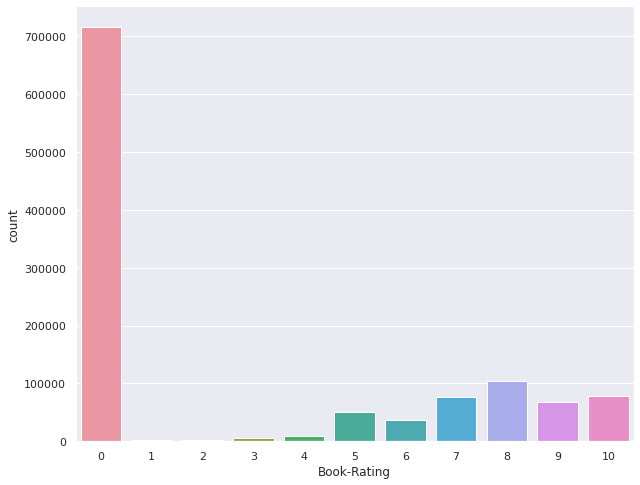

In [ ]:
# Vẽ biểu đồ cột thể hiện số lượng cho từng giá trị ratings trên
plt.figure(figsize=(10,8))
sns.countplot(x=Ratings['Book-Rating'],)
plt.show()

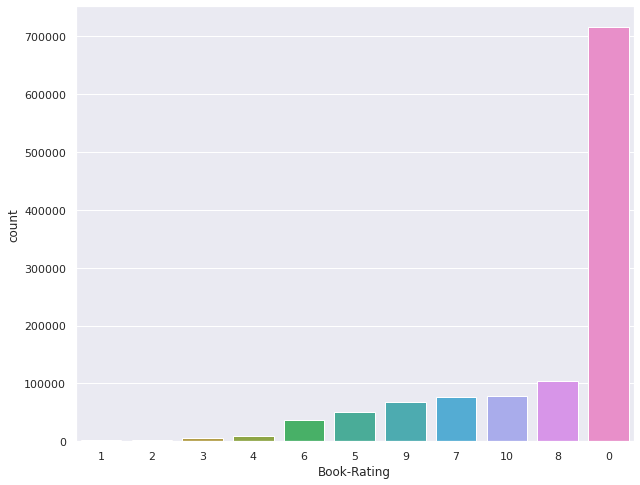

In [ ]:
# sắp xếp danh sách ratings theo chiều tăng dần theo giá trị rating
plt.figure(figsize=(10,8))
sns.countplot(x=Ratings['Book-Rating'], 
              order=Ratings['Book-Rating'].value_counts().sort_values().index)
plt.show()

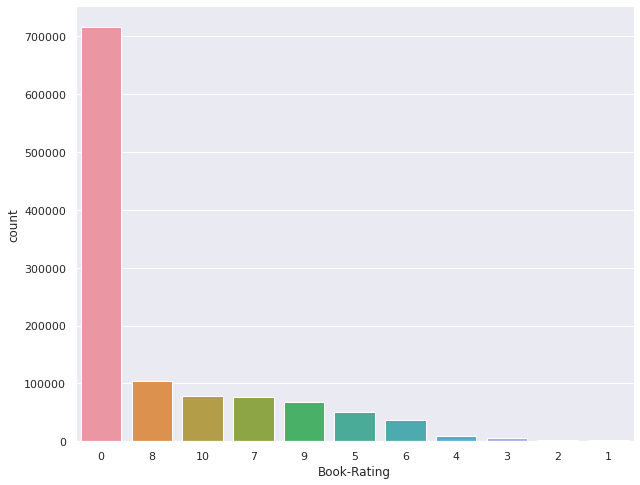

In [ ]:
# sắp xếp danh sách ratings theo chiều giảm dần theo giá trị rating
plt.figure(figsize=(10,8))
sns.countplot(x=Ratings['Book-Rating'], 
              order=Ratings['Book-Rating'].value_counts().sort_values(ascending=False).index)
plt.show()

In [ ]:
# đếm xem có bao nhiều người tham gia đánh giá
print(f'Số lượng người tham gia đánh giá là: {Ratings["User-ID"].nunique()} người')

Số lượng người tham gia đánh giá là: 105283 người


In [ ]:
# Đếm xem có bao nhiêu cuốn sách được đánh giá
print(f'Số lượng cuốn sách được đánh giá là: {Ratings["ISBN"].nunique()} cuốn sách')

Số lượng cuốn sách được đánh giá là: 340556 cuốn sách


In [ ]:
# Tính xem trung bình mỗi người rating bao nhiêu cuốn sách
Ratings.groupby(['User-ID'])['ISBN'].count().reset_index(name='num_book_ratings')

,User-ID,num_book_ratings
0,2,1
1,7,1
2,8,18
3,9,3
4,10,2
...,...,...
105278,278846,2
105279,278849,4
105280,278851,23
105281,278852,1


In [ ]:
# Tính xem mỗi bộ phim có bao nhiêu lượt rating
Ratings.groupby(['ISBN'])['User-ID'].count().reset_index(name='num_rating')

,ISBN,num_rating
0,0330299891,2
1,0375404120,2
2,0586045007,1
3,9022906116,2
4,9032803328,1
...,...,...
340551,cn113107,1
340552,ooo7156103,1
340553,§423350229,1
340554,´3499128624,1


In [ ]:
# groupby bảng ratings theo "ISBN" và tính rating trung bình cho từng cuốn sách
Ratings.groupby('ISBN')['Book-Rating'].mean().reset_index(name='avg_rating')

,ISBN,avg_rating
0,0330299891,3.0
1,0375404120,1.5
2,0586045007,0.0
3,9022906116,3.5
4,9032803328,0.0
...,...,...
340551,cn113107,0.0
340552,ooo7156103,7.0
340553,§423350229,0.0
340554,´3499128624,8.0


In [ ]:
# Tìm tên 10 cuốn sách có rating trung bình thấp nhất
top10_min = Ratings.groupby(['ISBN'])['Book-Rating'].mean().sort_values().reset_index(name='avg_ratings').head(10)
top10_min

,ISBN,avg_ratings
0,0688009328,0.0
1,0517524589,0.0
2,1400049083,0.0
3,0517525038,0.0
4,0517525046,0.0
5,1400048915,0.0
6,0517525380,0.0
7,0517525933,0.0
8,0517526018,0.0
9,0517526271,0.0


In [ ]:
top10_min_book = pd.merge(top10_min, Books, on='ISBN')
top10_min_book

,ISBN,avg_ratings,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0688009328,0.0,The Upside Down Riddle Book,Louis Phillips,1982,Harpercollins Library,http://images.amazon.com/images/P/0688009328.0...,http://images.amazon.com/images/P/0688009328.0...,http://images.amazon.com/images/P/0688009328.0...
1,0517524589,0.0,Color Dictionary of Flowers and Plants Compact,Crown,1981,Random House~trade,http://images.amazon.com/images/P/0517524589.0...,http://images.amazon.com/images/P/0517524589.0...,http://images.amazon.com/images/P/0517524589.0...
2,1400049083,0.0,City Dharma : Keeping Your Cool in the Chaos,ARTHUR JEON,2004,Harmony Books,http://images.amazon.com/images/P/1400049083.0...,http://images.amazon.com/images/P/1400049083.0...,http://images.amazon.com/images/P/1400049083.0...
3,0517525038,0.0,A Dictionary of Opera and Song Themes: Includi...,Harold. Barlow,1976,Crown Publishing Group (NY),http://images.amazon.com/images/P/0517525038.0...,http://images.amazon.com/images/P/0517525038.0...,http://images.amazon.com/images/P/0517525038.0...
4,0517525046,0.0,The truth about fiber in your food,Lawrence Galton,1976,Crown Publishers,http://images.amazon.com/images/P/0517525046.0...,http://images.amazon.com/images/P/0517525046.0...,http://images.amazon.com/images/P/0517525046.0...
5,1400048915,0.0,"Barman: Ping-Pong, Pathos, and Passing the Bar",ALEX WELLEN,2003,Harmony,http://images.amazon.com/images/P/1400048915.0...,http://images.amazon.com/images/P/1400048915.0...,http://images.amazon.com/images/P/1400048915.0...
6,0517525380,0.0,Dr. Atkins' Superenergy Diet: The Diet Revolut...,Robert C. Atkins,1977,Random House Value Pub,http://images.amazon.com/images/P/0517525380.0...,http://images.amazon.com/images/P/0517525380.0...,http://images.amazon.com/images/P/0517525380.0...
7,0517526018,0.0,Two Is Company,Judy Delton,1976,Random House Value Pub,http://images.amazon.com/images/P/0517526018.0...,http://images.amazon.com/images/P/0517526018.0...,http://images.amazon.com/images/P/0517526018.0...
8,0517526271,0.0,The House Book,Terence Conran,1986,Random House Value Publishing,http://images.amazon.com/images/P/0517526271.0...,http://images.amazon.com/images/P/0517526271.0...,http://images.amazon.com/images/P/0517526271.0...


In [ ]:
# Tìm tên 10 cuốn sách có rating trung bình cao nhất
top10_max = Ratings.groupby(['ISBN'])['Book-Rating'].mean().sort_values(ascending=False).reset_index(name='avg_ratings').head(10)
top10_max

,ISBN,avg_ratings
0,0874477050,10.0
1,561002010,10.0
2,0590939874,10.0
3,1570761914,10.0
4,56500624X,10.0
5,157076154X,10.0
6,1570761175,10.0
7,0373510365,10.0
8,0393092526,10.0
9,0590936026,10.0


In [ ]:
top10_max_book = pd.merge(top10_max, Books, on='ISBN')
top10_max_book

,ISBN,avg_ratings,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0874477050,10.0,"10 Real SATs, Third Edition",The College Board,2003,College Board,http://images.amazon.com/images/P/0874477050.0...,http://images.amazon.com/images/P/0874477050.0...,http://images.amazon.com/images/P/0874477050.0...
1,0590939874,10.0,The Kid Who Ran for President,Dan Gutman,1996,Scholastic,http://images.amazon.com/images/P/0590939874.0...,http://images.amazon.com/images/P/0590939874.0...,http://images.amazon.com/images/P/0590939874.0...
2,1570761914,10.0,ANIMAL KNITS,Zoe Mellor,2001,Trafalgar Square Publishing,http://images.amazon.com/images/P/1570761914.0...,http://images.amazon.com/images/P/1570761914.0...,http://images.amazon.com/images/P/1570761914.0...
3,157076154X,10.0,Celtic Needlepoint,Alice Starmore,1999,Trafalgar Square,http://images.amazon.com/images/P/157076154X.0...,http://images.amazon.com/images/P/157076154X.0...,http://images.amazon.com/images/P/157076154X.0...
4,1570761175,10.0,Plants for Small Spaces,Stephanie Donaldson,1998,Trafalgar Square Publishing,http://images.amazon.com/images/P/1570761175.0...,http://images.amazon.com/images/P/1570761175.0...,http://images.amazon.com/images/P/1570761175.0...
5,0373510365,10.0,Less Of A Stranger #36 (Nora Roberts Language ...,Nora Roberts,1993,Silhouette,http://images.amazon.com/images/P/0373510365.0...,http://images.amazon.com/images/P/0373510365.0...,http://images.amazon.com/images/P/0373510365.0...
6,0393092526,10.0,On Liberty (Norton Critical Edition),John Stuart Mill,1975,W W Norton &amp; Co,http://images.amazon.com/images/P/0393092526.0...,http://images.amazon.com/images/P/0393092526.0...,http://images.amazon.com/images/P/0393092526.0...
7,0590936026,10.0,Everything You Always Wanted to Know About Kin...,Ellen Booth Church,1996,Scholastic,http://images.amazon.com/images/P/0590936026.0...,http://images.amazon.com/images/P/0590936026.0...,http://images.amazon.com/images/P/0590936026.0...


In [ ]:
# merge bảng ratings, và books theo cột "ISBN"
df_Ratings_Books = pd.merge(Ratings, Books, on='ISBN')
df_Ratings_Books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031127,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031128,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031129,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031130,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [ ]:
Ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
# tạo data ratings mới bằng 1/20 kích thước dữ liệu ba đầu
Ratings_new = Ratings.iloc[:int(Ratings.shape[0]/20),:]
Ratings_new

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
57484,11676,3596156157,7
57485,11676,3596156165,0
57486,11676,3596156955,0
57487,11676,3596157282,8


In [ ]:
# Chuyển bảng ratings sang dataframe với các cột là "User-ID" và các hàng là "ISBN" (*)
Ratings_new_df = Ratings_new.pivot(index='ISBN', columns='User-ID')['Book-Rating']
Ratings_new_df

User-ID,2,7,8,9,10,12,14,16,17,19,...,278832,278836,278838,278843,278844,278846,278849,278851,278852,278854
ISBN,,,,,,,,,,,,,,,,,,,,,
9022906116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 7336 1053 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0/330/25864/8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00 14 02 5314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O76790592X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O809463121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"\0210000010""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# chuyển (*) sang numpy.ndarray (như ma trân rating) (**)
Rating_new_array = Ratings_new_df.to_numpy(na_value=0)
Rating_new_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Nhân ma ma trận trên với 2.5
Rating_new_array_multi_2 = Rating_new_array*2.5
Rating_new_array_multi_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Cộng ma ma trận trên với 1
Rating_new_array_add_1 = Rating_new_array+1
Rating_new_array_add_1

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
# lấy ra dòng đầu tiên trong (*) và chuyển sang numpy.ndarray (như vector cho ISBN = 034545104X)
array_book_1 = Ratings_new_df.iloc[0:1,:].to_numpy(na_value=0)
array_book_1

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# lấy ra dòng thứ 2 trong (*) và chuyển sang numpy.ndarray (như vector cho ISBN = 155061224)
array_book_2 = Ratings_new_df.iloc[1:2,:].to_numpy(na_value=0)
array_book_2

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# tính tích vô hướng của hai vector trên
Dot_1_2 = np.vdot(array_book_1, array_book_2)
Dot_1_2

0.0

In [ ]:
# tính giá trị cosine giữa hai vector trên
Cosine_1_2 = cosine_similarity(array_book_1, array_book_2)
Cosine_1_2

array([[0.]])

In [ ]:
# tích của vector ISBN = 155061224 với ma trận (**)
Vector_matrix = Ratings_new_df*array_book_2
Vector_matrix

User-ID,2,7,8,9,10,12,14,16,17,19,...,278832,278836,278838,278843,278844,278846,278849,278851,278852,278854
ISBN,,,,,,,,,,,,,,,,,,,,,
9022906116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 7336 1053 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0/330/25864/8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00 14 02 5314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O76790592X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O809463121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"\0210000010""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Thu Thập Dữ Liệu

Crawl data from [Báo Dân Trí](https://dantri.com.vn/)

### Get URL of Categoriers

In [ ]:
url_dantri = 'https://dantri.com.vn'

In [ ]:
BaoDanTri = requests.get(url_dantri).content
print(BaoDanTri)

b'<!DOCTYPE html>\r\n<html lang="vi" xmlns="http://www.w3.org/1999/xhtml">\r\n<head><meta charset="UTF-8"><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no"><meta name="format-detection" content="telephone=no"><meta name="robots" content="index,follow,all"><title>Tin t\xe1\xbb\xa9c Vi\xe1\xbb\x87t Nam v\xc3\xa0 qu\xe1\xbb\x91c t\xe1\xba\xbf n\xc3\xb3ng, nhanh, c\xe1\xba\xadp nh\xe1\xba\xadt 24h | B\xc3\xa1o D\xc3\xa2n tr\xc3\xad</title><meta name="description" content="\xc4\x90\xe1\xbb\x8dc b\xc3\xa1o dantri - Tin t\xe1\xbb\xa9c m\xe1\xbb\x9bi nh\xe1\xba\xa5t, Th\xc3\xb4ng tin nhanh ch\xc3\xadnh x\xc3\xa1c \xc4\x91\xc6\xb0\xe1\xbb\xa3c c\xe1\xba\xadp nh\xe1\xba\xadt h\xc3\xa0ng gi\xe1\xbb\x9d. b\xc3\xa1o n\xc3\xb3i \xc4\x91\xe1\xbb\x8dc tin t\xe1\xbb\xa9c online Vi\xe1\xbb\x87t Nam Th\xe1\xba\xbf gi\xe1\xbb\x9bi n\xc3\xb3ng nh\xe1\xba\xa5t trong ng\xc3\xa0y, Kinh doanh Vi\xe1\xbb\x87c l\xc3\xa0m, Ph\xc3\xa1p lu\xe1\x

In [ ]:
soup_DT = BeautifulSoup(BaoDanTri, 'html.parser')
print(soup_DT)

<!DOCTYPE html>

<html lang="vi" xmlns="http://www.w3.org/1999/xhtml">
<head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/><meta content="telephone=no" name="format-detection"/><meta content="index,follow,all" name="robots"/><title>Tin tức Việt Nam và quốc tế nóng, nhanh, cập nhật 24h | Báo Dân trí</title><meta content="Đọc báo dantri - Tin tức mới nhất, Thông tin nhanh chính xác được cập nhật hàng giờ. báo nói đọc tin tức online Việt Nam Thế giới nóng nhất trong ngày, Kinh doanh Việc làm, Pháp luật Đời sống, Giáo dục Sức khỏe, Thể thao Giải trí, Công nghệ, Văn hóa Xã hội, Ôtô Xe máy, Tình yêu, Nhân ái, Bạn đọc" name="description"/><meta content="dantri,báo điện tử dantri,thời tiết,tin tức,tin nhanh,thể thao,dự báo thời tiết,tin the thao,thể thao 24h,giá vàng hôm nay,tin the gioi,đọc báo,tin moi,giá vàng,thời tiết hôm nay,tin tức online,bóng đá việt nam,pháp luật,dự báo thời tiết hôm nay,

In [ ]:
def get_url_of_categories(soup):
  url_categories = soup.find('ol', {'class': 'nf-menu'}).find_all('a', href=True)

  list_url_category = []
  list_name_category = []
  name_categories = ['Xã hội', 'Thế giới', 'Kinh doanh', 'Bất động sản', 'Thể thao','Việc làm', 
                     'Nhân ái', 'Sức khỏe', 'Văn hóa', 'Giải trí', 'Xe ++','Sức mạnh số', 
                     'Giáo dục', 'An sinh', 'Pháp luật', 'Du lịch', 'Đời sống', 'Tình yêu']
  # Lấy các URL của các category trên web
  for a in url_categories:
    if a.text in name_categories:
      list_url_category.append(a['href'])
      list_name_category.append(a.text)
      name_categories.remove(a.text)
      # print("Found the URL:", a['href'])
      # print('Found category:', a.text)
  
  return (list_url_category, list_name_category)

In [ ]:
(url_categories, name_categories) = get_url_of_categories(soup_DT)
for i in range(len(url_categories)):
  url_categories[i] = url_dantri+url_categories[i].replace(".htm","")
df_categories = pd.DataFrame({'URL Categories' : url_categories,
                             'Name Categories' : name_categories})
df_categories

,URL Categories,Name Categories
0,https://dantri.com.vn/xa-hoi,Xã hội
1,https://dantri.com.vn/the-gioi,Thế giới
2,https://dantri.com.vn/kinh-doanh,Kinh doanh
3,https://dantri.com.vn/bat-dong-san,Bất động sản
4,https://dantri.com.vn/the-thao,Thể thao
5,https://dantri.com.vn/lao-dong-viec-lam,Việc làm
6,https://dantri.com.vn/tam-long-nhan-ai,Nhân ái
7,https://dantri.com.vn/suc-khoe,Sức khỏe
8,https://dantri.com.vn/van-hoa,Văn hóa
9,https://dantri.com.vn/giai-tri,Giải trí


#### Get URL of articles from each category

In [ ]:
# Lấy danh sách các url page của các thể loại
def get_list_page(url_categories):
  list_pages = []
  for cate in url_categories:
    for page in range(1, 31):
      url_page = f'{cate}/trang-{page}.htm'
      # print(url_page)
      list_pages.append(url_page)
  
  return list_pages

In [ ]:
# Hàm lấy url của tất cả các bài báo trong page
def Crawl_url_article_on_page(url):
  list_url_articles = []

  Content = requests.get(url).content
  Soup = BeautifulSoup(Content, 'html.parser')
  url_articles = Soup.find('div', {'class': 'article list'}).find_all('a', href=True)

  for a in url_articles:
    list_url_articles.append(url_dantri+a['href'])
    # print("Found the URL:", url_dantri+a['href'])
  return list(set(list_url_articles))

In [ ]:
# Lấy url của tất cả các bài báo tất cả các page của từng thể loại
def get_url_of_articles_each_category(url_categories):
  url_page = get_list_page(url_categories)
  list_url_articles = []

  for page in tqdm(url_page):
    list_url_articles.extend(Crawl_url_article_on_page(page))
    # print(page)

  return list_url_articles

In [ ]:
list_url_articles = get_url_of_articles_each_category(url_categories)

100%|██████████| 540/540 [10:52<00:00,  1.21s/it]


In [ ]:
list_url_articles

['https://dantri.com.vn/phap-luat/so-y-te-gui-van-ban-toi-toa-truoc-phien-xu-vu-sai-pham-trong-dau-thau-thuoc-20220921132023958.htm',
 'https://dantri.com.vn/phap-luat/lanh-dao-dia-phuong-noi-gi-ve-co-gai-bi-to-cao-lua-dao-the-ky-20220915232445262.htm',
 'https://dantri.com.vn/xa-hoi/bo-gtvt-dang-phai-giai-quyet-3-don-kien-o-trong-tai-quoc-te-20220921093244040.htm',
 'https://dantri.com.vn/xa-hoi/chi-cuc-truong-chi-cuc-kiem-lam-quang-tri-bi-ky-luat-20220921111152216.htm',
 'https://dantri.com.vn/phap-luat/nu-huong-dan-vien-du-lich-bi-hiep-dam-tai-homestay-o-ha-giang-20220921104425195.htm',
 'https://dantri.com.vn/xa-hoi/nam-sinh-lao-xuong-ho-cong-trinh-cuu-4-hoc-sinh-duoi-nuoc-20220920192517665.htm',
 'https://dantri.com.vn/xa-hoi/vu-6-con-te-giac-chet-bat-thuong-gia-nhap-ve-1-ty-dongcon-20220921113011868.htm',
 'https://dantri.com.vn/xa-hoi/tim-kiem-dai-uy-cong-an-mat-tich-bi-an-hon-mot-thang-20220921102608190.htm',
 'https://dantri.com.vn/xa-hoi/chay-nha-dan-du-luan-xon-xao-don-doan-

In [ ]:
df_url_articles = pd.DataFrame({'URL Articles': list_url_articles})
df_url_articles

,URL Articles
0,https://dantri.com.vn/phap-luat/so-y-te-gui-va...
1,https://dantri.com.vn/phap-luat/lanh-dao-dia-p...
2,https://dantri.com.vn/xa-hoi/bo-gtvt-dang-phai...
3,https://dantri.com.vn/xa-hoi/chi-cuc-truong-ch...
4,https://dantri.com.vn/phap-luat/nu-huong-dan-v...
...,...
10669,https://dantri.com.vn/tinh-yeu-gioi-tinh/tu-la...
10670,https://dantri.com.vn/tinh-yeu-gioi-tinh/ngot-...
10671,https://dantri.com.vn/tinh-yeu-gioi-tinh/muon-...
10672,https://dantri.com.vn/tinh-yeu-gioi-tinh/dua-t...


In [ ]:
df_url_articles.to_csv(f'{PATH}/url_articles.csv')

In [ ]:
df_url_articles = pd.read_csv(f'{PATH}/url_articles.csv')
df_url_articles

,Unnamed: 0,URL Articles
0,0,https://dantri.com.vn/phap-luat/so-y-te-gui-va...
1,1,https://dantri.com.vn/phap-luat/lanh-dao-dia-p...
2,2,https://dantri.com.vn/xa-hoi/bo-gtvt-dang-phai...
3,3,https://dantri.com.vn/xa-hoi/chi-cuc-truong-ch...
4,4,https://dantri.com.vn/phap-luat/nu-huong-dan-v...
...,...,...
10669,10669,https://dantri.com.vn/tinh-yeu-gioi-tinh/tu-la...
10670,10670,https://dantri.com.vn/tinh-yeu-gioi-tinh/ngot-...
10671,10671,https://dantri.com.vn/tinh-yeu-gioi-tinh/muon-...
10672,10672,https://dantri.com.vn/tinh-yeu-gioi-tinh/dua-t...


In [ ]:
list_url_articles = df_url_articles['URL Articles']
list_url_articles

0        https://dantri.com.vn/phap-luat/so-y-te-gui-va...
1        https://dantri.com.vn/phap-luat/lanh-dao-dia-p...
2        https://dantri.com.vn/xa-hoi/bo-gtvt-dang-phai...
3        https://dantri.com.vn/xa-hoi/chi-cuc-truong-ch...
4        https://dantri.com.vn/phap-luat/nu-huong-dan-v...
                               ...                        
10669    https://dantri.com.vn/tinh-yeu-gioi-tinh/tu-la...
10670    https://dantri.com.vn/tinh-yeu-gioi-tinh/ngot-...
10671    https://dantri.com.vn/tinh-yeu-gioi-tinh/muon-...
10672    https://dantri.com.vn/tinh-yeu-gioi-tinh/dua-t...
10673    https://dantri.com.vn/tinh-yeu-gioi-tinh/be-9-...
Name: URL Articles, Length: 10674, dtype: object

### Crawl URL Article of each Category

In [ ]:
# content_article = requests.get('https://dantri.com.vn/xa-hoi/truy-tim-2-thanh-nien-boc-dau-danh-vong-vuot-den-do-20220920140632520.htm').content
# soup_article = BeautifulSoup(content_article, 'html.parser')
# soup_article

In [ ]:
# Title
# Title = soup_article.find('h1', {'class':'title-page detail'}).text.strip()
# # Content
# Content = ''
# for c in soup_article.find('div', {'class':'singular-content'}).find_all('p'):
#   Content += ' ' + c.text

# Content = Content.strip()
# # Author
# Author = soup_article.find('div', {'class':'author-name'}).text.strip()
# Category
# Category = soup_article.find('ul', {'class':'breadcrumbs'}).find('a').text.strip()
# Category
# Date
# Date = soup_article.find('time', {'class':'author-time'}).text.strip()
# # Number reaction
# num_react = soup_article.find('div', {'data-module':'reaction-object'})#.text.strip()
# num_react

In [ ]:
# Hàm crawl thông tin của 1 bài báo
def Crawl_Article(url):
  content_article = requests.get(url).content
  soup_article = BeautifulSoup(content_article, 'html.parser')
  # Title
  Title = soup_article.find('h1', {'class':'title-page detail'}).text.strip()
  # Content
  Content = ''
  for c in soup_article.find('div', {'class':'singular-content'}).find_all('p'):
    Content += ' ' + c.text

  Content = Content.strip()
  # Author
  Author = soup_article.find('div', {'class':'author-name'}).text.strip()
  # Category
  Category = soup_article.find('ul', {'class':'breadcrumbs'}).find('a').text.strip()
  # Date
  Date = soup_article.find('time', {'class':'author-time'}).text.strip()
  # Number reaction
  num_react = soup_article.find('div', {'class':'U2PogykaXwtfXinDFfaW'})#.text.strip()

  return [Title, Content, Author, Category, Date, num_react]

In [ ]:
STT = []
Title = []
Content = []
Author = []
Category = []
Date = []
num_react = []
count = 1

for url in tqdm(list_url_articles):
  try:
    Data_Article = Crawl_Article(url)
    STT.append(count)
    Title.append(Data_Article[0])
    Content.append(Data_Article[1])
    Author.append(Data_Article[2])
    Category.append(Data_Article[3])
    Date.append(Data_Article[4])
    num_react.append(Data_Article[5])
    count += 1
  except:
    continue

100%|██████████| 10674/10674 [2:23:11<00:00,  1.24it/s]


In [ ]:
# Result
Dataset = pd.DataFrame({'STT': STT,
                        'Tiêu đề bài báo': Title,
                        'Nội dung bài báo': Content,
                        'Tác giả': Author,
                        'Thể loại': Category,
                        'Thời gian đăng bài': Date,
                        'Tổng số lượt reaction': num_react})

Dataset

,STT,Tiêu đề bài báo,Nội dung bài báo,Tác giả,Thể loại,Thời gian đăng bài,Tổng số lượt reaction
0,1,Sở Y tế gửi văn bản tới tòa trước phiên xử vụ ...,"Sáng 21/9, TAND tỉnh Đắk Lắk đã mở phiên tòa s...",Thúy Diễm,Pháp luật,"Thứ tư, 21/09/2022 - 14:42",None
1,2,Lãnh đạo địa phương nói gì về cô gái bị tố cáo...,"Liên quan đến vụ tố cáo ""cú lừa thế kỷ"", trao ...",Hải Nam,Pháp luật,"Thứ tư, 21/09/2022 - 15:40",None
2,3,"""Bộ GTVT đang phải giải quyết 3 đơn kiện ở trọ...",Góp ý kiến về dự án Luật Đấu thầu (sửa đổi) ch...,Thế Kha,Xã hội,"Thứ tư, 21/09/2022 - 10:51",None
3,4,Chi cục trưởng Chi cục Kiểm lâm Quảng Trị bị k...,"Ngày 21/9, thông tin từ Đảng ủy Khối Cơ quan v...",Tiến Thành,Xã hội,"Thứ tư, 21/09/2022 - 13:36",None
4,5,Nữ hướng dẫn viên du lịch bị hiếp dâm tại home...,"Sáng 21/9, trao đổi với PV Dân trí, lãnh đạo C...",Trần Thanh,Pháp luật,"Thứ tư, 21/09/2022 - 11:01",None
...,...,...,...,...,...,...,...
9822,9823,"43 tuổi, một lần ""lỡ"" cùng bạn thân của vợ, tô...",Ảnh minh họa: Getty Images. Từ trẻ tôi đã là ...,Huyền Anh,Tình yêu - Giới tính,"Thứ hai, 04/04/2022 - 17:11",None
9823,9824,"""Không chung chăn gối với chồng nhưng vợ tôi l...",Ảnh minh họa: Getty Images. Chúng tôi quen nha...,Hải Đường,Tình yêu - Giới tính,"Thứ bảy, 02/04/2022 - 12:37",None
9824,9825,"Muốn có được một người phụ nữ trưởng thành, đừ...","Để có được một người phụ nữ trưởng thành, bạn ...",Hải Đường,Tình yêu - Giới tính,"Thứ ba, 05/04/2022 - 08:56",None
9825,9826,Mượn máy bạn thân gọi cho chồng cũ báo tin vui...,Hà Vy là một cô gái tốt. Cô hy vọng tương lai ...,Hải Đường,Tình yêu - Giới tính,"Thứ ba, 05/04/2022 - 20:05",None


In [ ]:
Dataset.to_csv(f'{PATH}/Dataset_Articles.csv', index=False)